Leer Texto de imagenes

In [3]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import csv
import matplotlib.pyplot as plt

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


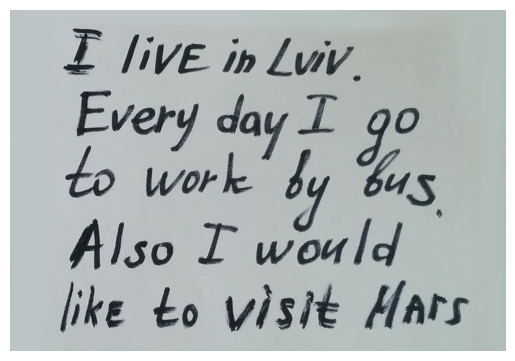

1903
En la imagen se ha encontrado:  1903
Texto reconocido guardado en data\output\output_text\output_text_trOCR.csv


In [9]:
# Carga la imagen del cómic
image_path = 'data\input\imagenes_prueba\\texto_manuscrito.png'

# Cargar el procesador y el modelo
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')

# Cargar la imagen
image = Image.open(image_path).convert("RGB")

# Procesar la imagen y generar el texto
pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

#imprime la imagen
plt.imshow(image)
plt.axis('off')
plt.show()

# Imprimir el texto generado
print(generated_text)

# Texto que ha encontrado
print("En la imagen se ha encontrado: ", generated_text)

# Escribir el texto reconocido en un archivo CSV
output_csv = 'data\output\output_text\output_text_trOCR.csv'
with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow([generated_text])

print("Texto reconocido guardado en", output_csv)